In [3]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import collections
import numpy as np
from scipy import stats
from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 1.1 Data Selection

In [3]:
data = pd.read_csv(PATH+'backup/complete_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
#data

In [4]:
included_dates = pd.date_range(start='1985-03-01', end='2021-01-01', freq='Q').strftime('%Y-%m')
data.drop(list( set(data.index) - set(included_dates) ), axis=0, inplace=True)
#data

In [5]:
include = ['P/E', 'PEG', 'FCF', 'P/FCF', 'P/S', 'P/B', 'ROE', 'EPSBasic', 'EBIT', 'TotalLiabilities']
include += ['EPSDiluted', 'EPSDiluted(TTM)', 'CashfromOperations', 'CashfromOperations(TTM)', 'NetChangeinCapitalExpenditures', 'NetChangeinCapitalExpenditures(TTM)', 'Revenue', 'Revenue(TTM)', 'NetIncome', 'NetIncome(TTM)', 'PricePerShare', 'TotalAssets', 'TotalLiabilities', 'AverageBasicSharesOutstanding', ]
data.drop(list(set(data.columns.get_level_values(0)) - set(include)), level=0, axis=1, inplace=True)
#data

In [6]:
stk_miss = pd.Series(dtype='int64')
for stock in set(data.columns.get_level_values(1)):
    stk_miss[stock] = data.xs(stock, level=1, axis=1).isnull().sum().sum()
stk_miss.sort_values(ascending=True)

NSC       196
GL        203
LUV       203
UNP       209
PEP       214
L         218
VMC       222
EXPD      222
BDX       223
WDC       225
UDR       225
RHI       231
APD       231
PKI       232
IFF       232
PCAR      232
CAT       232
JBHT      232
GE        232
KMB       232
HON       232
NUE       232
HAS       232
PGR       233
BEN       233
RTX       233
BIO       234
BA        237
JNJ       238
CSX       241
AME       241
WHR       243
AAPL      244
IBM       245
MSI       245
DOV       245
HES       245
NEM       246
DIS       246
FRT       247
HSY       248
AON       249
ALK       250
DHR       250
ROL       250
TXT       251
PSA       252
GPC       252
MMM       253
CAH       254
KLAC      255
APA       257
UNH       257
SYY       258
PH        258
CLX       259
TROW      261
MO        262
GLW       263
CHD       266
TER       266
WST       267
HAL       267
CINF      267
BAX       268
KO        269
SLB       274
EMR       277
GD        277
K         278
PNR       284
VFC   

In [7]:
# NSC - INDUSTRIAL
# GL - FINANCIAL
# PEP - CONSUMER
# BDX - HEALTH CARE
# IBM - INFORMATION/TECH

In [8]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data.drop(list(set(data.columns.get_level_values(1)) - set(stock_sel)), axis=1, level=1, inplace=True)

In [9]:
for stock in stock_sel:
    data['Prediction', stock] = data['PricePerShare', stock].shift(1)
data

Attributes AverageBasicSharesOutstanding                                    \
Symbol                               BDX       GL      IBM      NSC    PEP   
2020-12                          0.29059  0.10420  0.89260  0.25330  1.379   
2020-09                          0.29043  0.10615  0.89140  0.25460  1.384   
2020-06                          0.28238  0.10644  0.88944  0.25540  1.387   
2020-03                          0.27201  0.10729  0.88800  0.25730  1.390   
2019-12                          0.27110  0.10811  0.88704  0.25940  1.393   
2019-09                          0.27062  0.10881  0.88600  0.26210  1.397   
2019-06                          0.27025  0.10965  0.88627  0.26480  1.401   
2019-03                          0.26988  0.11030  0.88960  0.26710  1.406   
2018-12                          0.26904  0.11139  0.90139  0.27050  1.409   
2018-09                          0.26861  0.11259  0.91120  0.27550  1.414   
2018-06                          0.26784  0.11335  0.91510  0.28130  1.417   
2018-03                          0.26734  0.11418  0.92068  0.28350  1.420   
2017-12                          0.23004  0.11505  0.92451  0.28520  1.419   
2017-09                          0.22832  0.11592  0.92944  0.28710  1.425   
2017-06                          0.22081  0.11665  0.93492  0.28900  1.428   
2017-03                          0.21358  0.11777  0.94244  0.29030  1.428   
2016-12                          0.21306  0.11857  0.94861  0.29090  1.427   
2016-09                          0.21358  0.11948  0.95400  0.29270  1.438   
2016-06                          0.21308  0.12048  0.95740  0.29470  1.443   
2016-03                          0.21247  0.12148  0.96170  0.29720  1.446   
2015-12                          0.21169  0.12301  0.96958  0.30010  1.451   
2015-09                          0.21108  0.12446  0.97510  0.30010  1.467   
2015-06                          0.21018  0.12582  0.98230  0.30290  1.476   
2015-03                          0.19608  0.12712  0.98810  0.30680  1.484   
2014-12                          0.19284  0.12830  0.99039  0.30910  1.491   
2014-09                          0.19232  0.12997  0.99180  0.30940  1.507   
2014-06                          0.19305  0.13149  0.99960  0.30950  1.515   
2014-03                          0.19361  0.13316  1.03500  0.30950  1.524   
2013-12                          0.19420  0.13506  1.07300  0.30860  1.529   
2013-09                          0.19469  0.13690  1.09100  0.31040  1.542   
2013-06                          0.19488  0.13829  1.10100  0.31410  1.548   
2013-03                          0.19461  0.14037  1.11400  0.31450  1.544   
2012-12                          0.19643  0.14159  1.12500  0.31490  1.542   
2012-09                          0.19902  0.14269  1.13700  0.31770  1.556   
2012-06                          0.20202  0.14534  1.14900  0.32270  1.563   
2012-03                          0.20643  0.15010  1.15900  0.32830  1.568   
2011-12                          0.21430  0.15195  1.17200  0.33260  1.561   
2011-09                          0.21668  0.15717  1.18900  0.34320  1.578   
2011-06                          0.21897  0.16652  1.20500  0.35100  1.583   
2011-03                          0.22089  0.17523  1.22200  0.35520  1.583   
2010-12                          0.22808  0.17942  1.24000  0.36050  1.581   
2010-09                          0.23136  0.18175  1.25500  0.36630  1.588   
2010-06                          0.23324  0.27681  1.27900  0.36970  1.608   
2010-03                          0.23532  0.18640  1.30100  0.36950  1.582   
2009-12                          0.23736  0.18628  1.31800  0.36800  1.561   
2009-09                          0.23915  0.18618  1.32000  0.36730  1.558   
2009-06                          0.24011  0.18615  1.32600  0.36680  1.557   
2009-03                          0.24024  0.18872  1.34400  0.36620  1.555   
2008-12                          0.24240  0.19117  1.34700  0.36600  1.546   
2008-09               

In [10]:
for stock in stock_sel:
    data['QMonth', stock] = pd.DatetimeIndex(list(data.index)).strftime('%m')
data

Attributes AverageBasicSharesOutstanding                                    \
Symbol                               BDX       GL      IBM      NSC    PEP   
2020-12                          0.29059  0.10420  0.89260  0.25330  1.379   
2020-09                          0.29043  0.10615  0.89140  0.25460  1.384   
2020-06                          0.28238  0.10644  0.88944  0.25540  1.387   
2020-03                          0.27201  0.10729  0.88800  0.25730  1.390   
2019-12                          0.27110  0.10811  0.88704  0.25940  1.393   
2019-09                          0.27062  0.10881  0.88600  0.26210  1.397   
2019-06                          0.27025  0.10965  0.88627  0.26480  1.401   
2019-03                          0.26988  0.11030  0.88960  0.26710  1.406   
2018-12                          0.26904  0.11139  0.90139  0.27050  1.409   
2018-09                          0.26861  0.11259  0.91120  0.27550  1.414   
2018-06                          0.26784  0.11335  0.91510  0.28130  1.417   
2018-03                          0.26734  0.11418  0.92068  0.28350  1.420   
2017-12                          0.23004  0.11505  0.92451  0.28520  1.419   
2017-09                          0.22832  0.11592  0.92944  0.28710  1.425   
2017-06                          0.22081  0.11665  0.93492  0.28900  1.428   
2017-03                          0.21358  0.11777  0.94244  0.29030  1.428   
2016-12                          0.21306  0.11857  0.94861  0.29090  1.427   
2016-09                          0.21358  0.11948  0.95400  0.29270  1.438   
2016-06                          0.21308  0.12048  0.95740  0.29470  1.443   
2016-03                          0.21247  0.12148  0.96170  0.29720  1.446   
2015-12                          0.21169  0.12301  0.96958  0.30010  1.451   
2015-09                          0.21108  0.12446  0.97510  0.30010  1.467   
2015-06                          0.21018  0.12582  0.98230  0.30290  1.476   
2015-03                          0.19608  0.12712  0.98810  0.30680  1.484   
2014-12                          0.19284  0.12830  0.99039  0.30910  1.491   
2014-09                          0.19232  0.12997  0.99180  0.30940  1.507   
2014-06                          0.19305  0.13149  0.99960  0.30950  1.515   
2014-03                          0.19361  0.13316  1.03500  0.30950  1.524   
2013-12                          0.19420  0.13506  1.07300  0.30860  1.529   
2013-09                          0.19469  0.13690  1.09100  0.31040  1.542   
2013-06                          0.19488  0.13829  1.10100  0.31410  1.548   
2013-03                          0.19461  0.14037  1.11400  0.31450  1.544   
2012-12                          0.19643  0.14159  1.12500  0.31490  1.542   
2012-09                          0.19902  0.14269  1.13700  0.31770  1.556   
2012-06                          0.20202  0.14534  1.14900  0.32270  1.563   
2012-03                          0.20643  0.15010  1.15900  0.32830  1.568   
2011-12                          0.21430  0.15195  1.17200  0.33260  1.561   
2011-09                          0.21668  0.15717  1.18900  0.34320  1.578   
2011-06                          0.21897  0.16652  1.20500  0.35100  1.583   
2011-03                          0.22089  0.17523  1.22200  0.35520  1.583   
2010-12                          0.22808  0.17942  1.24000  0.36050  1.581   
2010-09                          0.23136  0.18175  1.25500  0.36630  1.588   
2010-06                          0.23324  0.27681  1.27900  0.36970  1.608   
2010-03                          0.23532  0.18640  1.30100  0.36950  1.582   
2009-12                          0.23736  0.18628  1.31800  0.36800  1.561   
2009-09                          0.23915  0.18618  1.32000  0.36730  1.558   
2009-06                          0.24011  0.18615  1.32600  0.36680  1.557   
2009-03                          0.24024  0.18872  1.34400  0.36620  1.555   
2008-12                          0.24240  0.19117  1.34700  0.36600  1.546   
2008-09               

In [11]:
data.to_csv(PATH+'manual_features_dataset.csv')

## 1.2 Data Analysis

In [12]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data = pd.read_csv(PATH+'manual_features_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

Attributes AverageBasicSharesOutstanding                                    \
Symbol                               BDX       GL      IBM      NSC    PEP   
2020-12                          0.29059  0.10420  0.89260  0.25330  1.379   
2020-09                          0.29043  0.10615  0.89140  0.25460  1.384   
2020-06                          0.28238  0.10644  0.88944  0.25540  1.387   
2020-03                          0.27201  0.10729  0.88800  0.25730  1.390   
2019-12                          0.27110  0.10811  0.88704  0.25940  1.393   
2019-09                          0.27062  0.10881  0.88600  0.26210  1.397   
2019-06                          0.27025  0.10965  0.88627  0.26480  1.401   
2019-03                          0.26988  0.11030  0.88960  0.26710  1.406   
2018-12                          0.26904  0.11139  0.90139  0.27050  1.409   
2018-09                          0.26861  0.11259  0.91120  0.27550  1.414   
2018-06                          0.26784  0.11335  0.91510  0.28130  1.417   
2018-03                          0.26734  0.11418  0.92068  0.28350  1.420   
2017-12                          0.23004  0.11505  0.92451  0.28520  1.419   
2017-09                          0.22832  0.11592  0.92944  0.28710  1.425   
2017-06                          0.22081  0.11665  0.93492  0.28900  1.428   
2017-03                          0.21358  0.11777  0.94244  0.29030  1.428   
2016-12                          0.21306  0.11857  0.94861  0.29090  1.427   
2016-09                          0.21358  0.11948  0.95400  0.29270  1.438   
2016-06                          0.21308  0.12048  0.95740  0.29470  1.443   
2016-03                          0.21247  0.12148  0.96170  0.29720  1.446   
2015-12                          0.21169  0.12301  0.96958  0.30010  1.451   
2015-09                          0.21108  0.12446  0.97510  0.30010  1.467   
2015-06                          0.21018  0.12582  0.98230  0.30290  1.476   
2015-03                          0.19608  0.12712  0.98810  0.30680  1.484   
2014-12                          0.19284  0.12830  0.99039  0.30910  1.491   
2014-09                          0.19232  0.12997  0.99180  0.30940  1.507   
2014-06                          0.19305  0.13149  0.99960  0.30950  1.515   
2014-03                          0.19361  0.13316  1.03500  0.30950  1.524   
2013-12                          0.19420  0.13506  1.07300  0.30860  1.529   
2013-09                          0.19469  0.13690  1.09100  0.31040  1.542   
2013-06                          0.19488  0.13829  1.10100  0.31410  1.548   
2013-03                          0.19461  0.14037  1.11400  0.31450  1.544   
2012-12                          0.19643  0.14159  1.12500  0.31490  1.542   
2012-09                          0.19902  0.14269  1.13700  0.31770  1.556   
2012-06                          0.20202  0.14534  1.14900  0.32270  1.563   
2012-03                          0.20643  0.15010  1.15900  0.32830  1.568   
2011-12                          0.21430  0.15195  1.17200  0.33260  1.561   
2011-09                          0.21668  0.15717  1.18900  0.34320  1.578   
2011-06                          0.21897  0.16652  1.20500  0.35100  1.583   
2011-03                          0.22089  0.17523  1.22200  0.35520  1.583   
2010-12                          0.22808  0.17942  1.24000  0.36050  1.581   
2010-09                          0.23136  0.18175  1.25500  0.36630  1.588   
2010-06                          0.23324  0.27681  1.27900  0.36970  1.608   
2010-03                          0.23532  0.18640  1.30100  0.36950  1.582   
2009-12                          0.23736  0.18628  1.31800  0.36800  1.561   
2009-09                          0.23915  0.18618  1.32000  0.36730  1.558   
2009-06                          0.24011  0.18615  1.32600  0.36680  1.557   
2009-03                          0.24024  0.18872  1.34400  0.36620  1.555   
2008-12                          0.24240  0.19117  1.34700  0.36600  1.546   
2008-09               

In [13]:
include = ['P/E', 'PEG', 'FCF', 'P/FCF', 'P/S', 'P/B', 'ROE', 'EPSBasic', 'EBIT', 'TotalLiabilities', 'PricePerShare', 'Prediction', 'QMonth']
#include += ['EPSDiluted', 'EPSDiluted(TTM)', 'CashfromOperations', 'CashfromOperations(TTM)', 'NetChangeinCapitalExpenditures', 'NetChangeinCapitalExpenditures(TTM)', 'Revenue', 'Revenue(TTM)', 'NetIncome', 'NetIncome(TTM)', 'PricePerShare', 'TotalAssets', 'TotalLiabilities', 'AverageBasicSharesOutstanding', ]
data.drop(list(set(data.columns.get_level_values(0)) - set(include)), level=0, axis=1, inplace=True)

In [14]:
data.shape

(144, 65)

In [15]:
data.xs('IBM', level=1, axis=1).shape

(144, 13)

In [16]:
data.xs('IBM', level=1, axis=1).dtypes

Attributes
EBIT                float64
EPSBasic            float64
FCF                 float64
P/B                 float64
P/E                 float64
P/FCF               float64
P/S                 float64
PEG                 float64
PricePerShare       float64
ROE                 float64
TotalLiabilities    float64
Prediction          float64
QMonth                int64
dtype: object

In [17]:
# Number of na values per stock
stk_miss = pd.Series(dtype='int64')
for stock in set(data.columns.get_level_values(1)):
    stk_miss[stock] = data.xs(stock, level=1, axis=1).isnull().sum().sum()
stk_miss.sort_values(ascending=True)

NSC     98
PEP    111
GL     114
BDX    119
IBM    132
dtype: int64

In [18]:
# Number of na values per feature
att_miss = pd.Series(dtype='int64')
for att in set(data.columns.get_level_values(0)):
    att_miss[att] = data.xs(att, level=0, axis=1).isnull().sum().sum()
att_miss.sort_values(ascending=True)

QMonth                0
P/S                   0
PricePerShare         0
Prediction            5
EPSBasic              9
EBIT                 17
P/E                  18
PEG                  54
TotalLiabilities     69
P/B                  69
ROE                 109
P/FCF               112
FCF                 112
dtype: int64

In [19]:
# Number of na values per time period
quarters = list(data.index)
q_miss = pd.Series(dtype='int64')
for quarter in quarters:
    q_miss[quarter] = data.loc[quarter].isnull().sum().sum()
q_miss.sort_index(ascending=True)

1985-03    31
1985-06    31
1985-09    31
1985-12    25
1986-03    28
1986-06    26
1986-09    27
1986-12    25
1987-03    27
1987-06    26
1987-09    27
1987-12    24
1988-03    28
1988-06    26
1988-09    26
1988-12    24
1989-03    24
1989-06    21
1989-09    19
1989-12    17
1990-03    12
1990-06    14
1990-09    11
1990-12     2
1991-03     2
1991-06     1
1991-09     1
1991-12     1
1992-03     0
1992-06     0
1992-09     0
1992-12     0
1993-03     0
1993-06     0
1993-09     0
1993-12     0
1994-03     0
1994-06     0
1994-09     0
1994-12     0
1995-03     0
1995-06     0
1995-09     0
1995-12     0
1996-03     0
1996-06     0
1996-09     0
1996-12     0
1997-03     0
1997-06     0
1997-09     0
1997-12     0
1998-03     0
1998-06     0
1998-09     0
1998-12     0
1999-03     0
1999-06     0
1999-09     0
1999-12     0
2000-03     0
2000-06     0
2000-09     0
2000-12     1
2001-03     0
2001-06     0
2001-09     0
2001-12     0
2002-03     0
2002-06     0
2002-09     0
2002-1

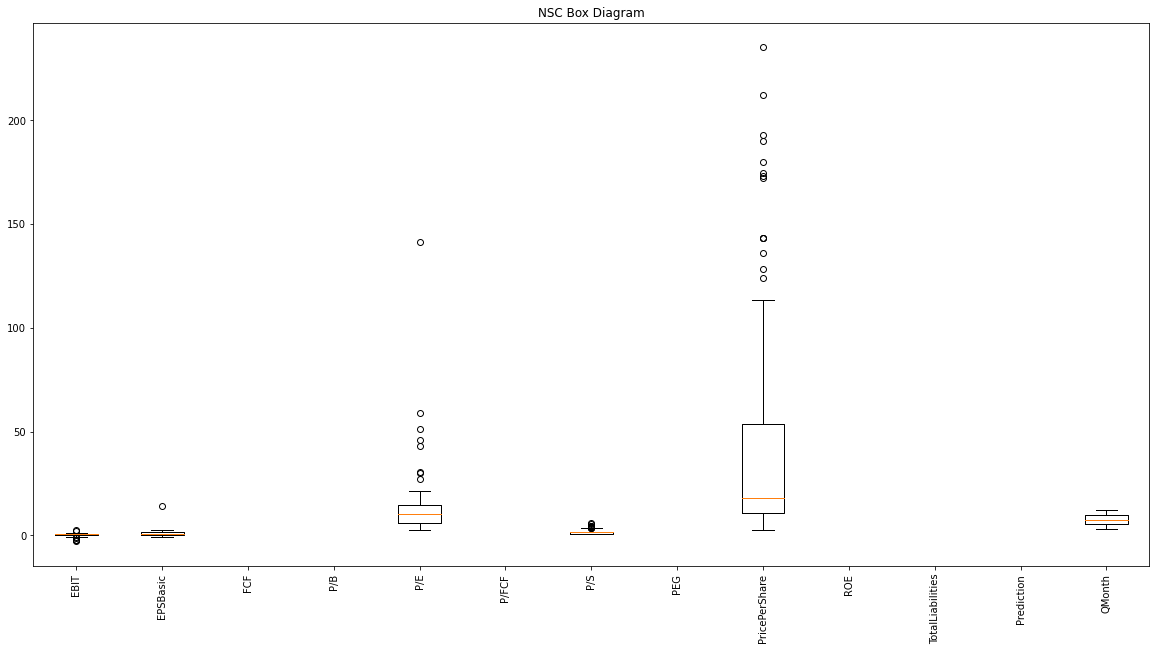

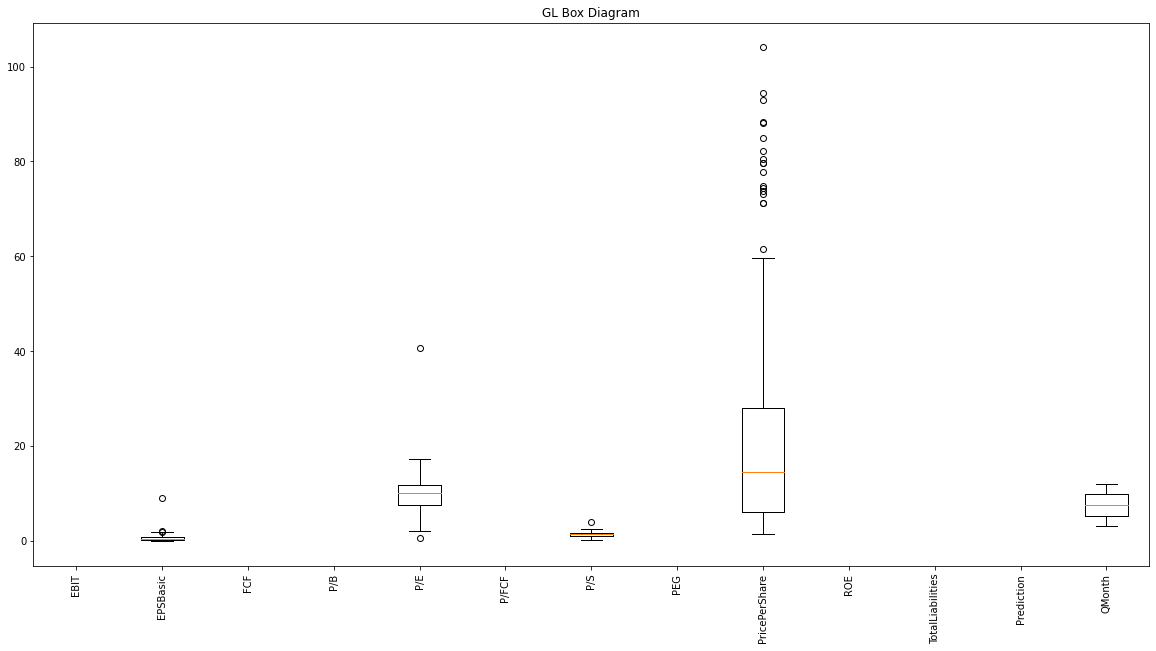

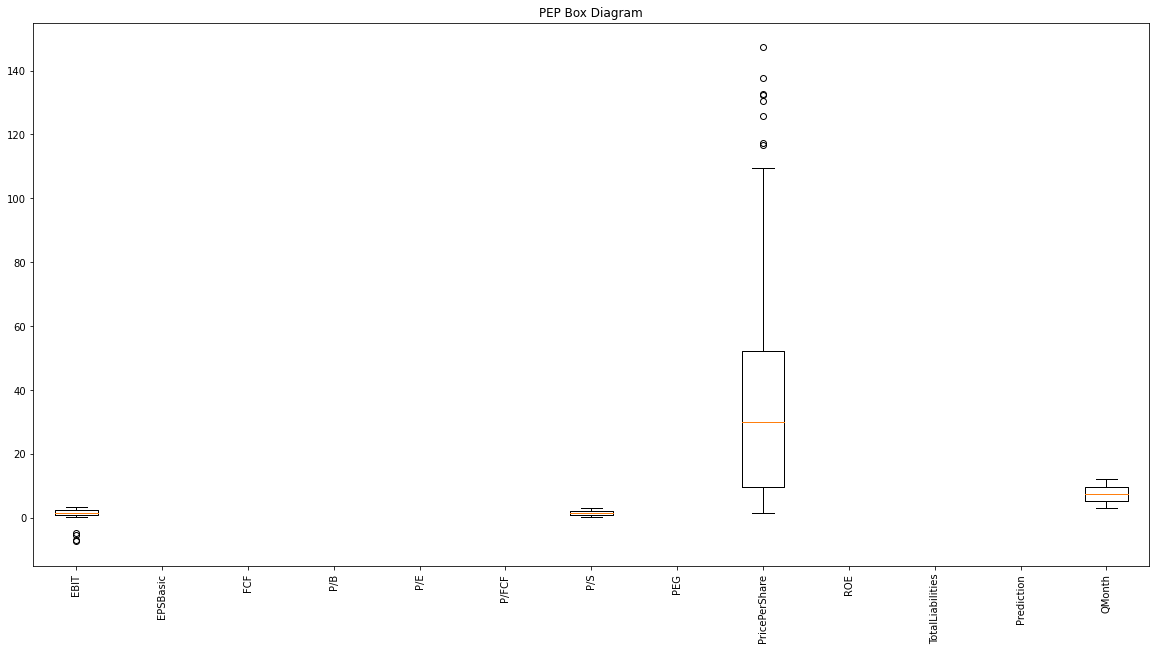

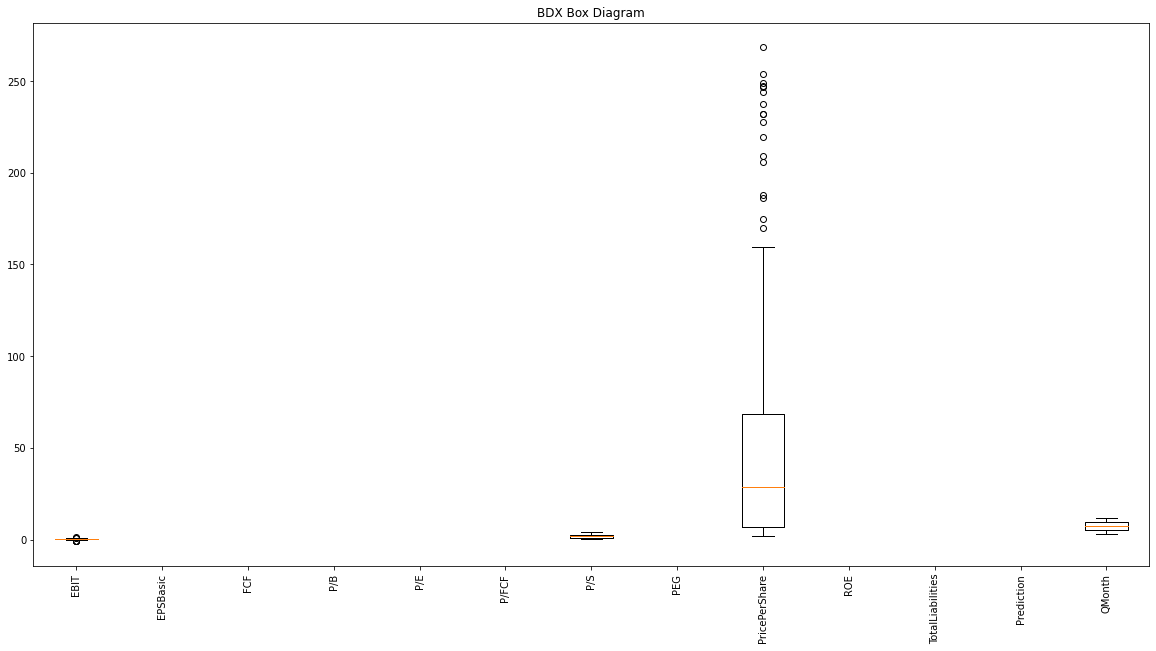

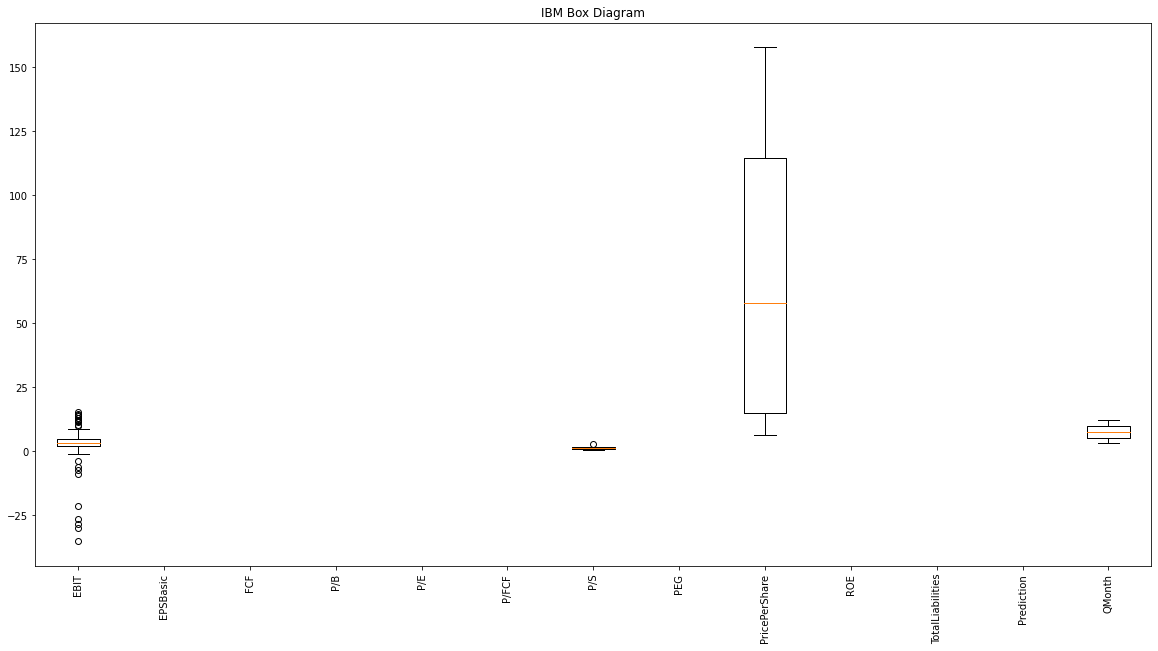

In [20]:
# Box Diagrams for numeric attributes
for stock in stock_sel:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    ax1.set_title(stock+' Box Diagram')
    ax1.boxplot(data.xs(stock, level=1, axis=1), labels=data.xs(stock, level=1, axis=1).columns)
    plt.xticks(rotation=90)
    plt.show()

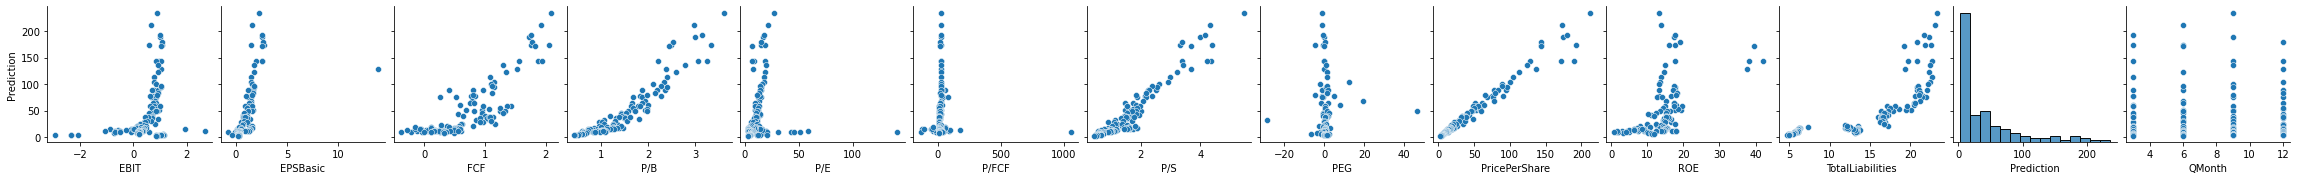

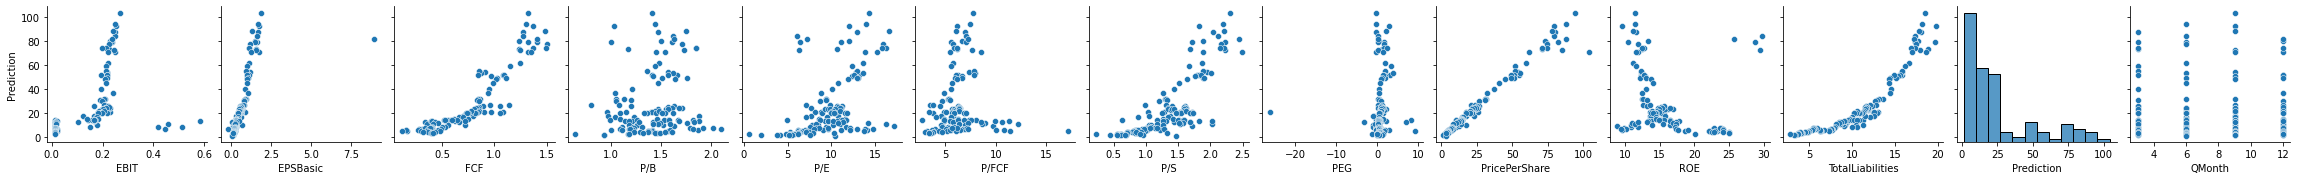

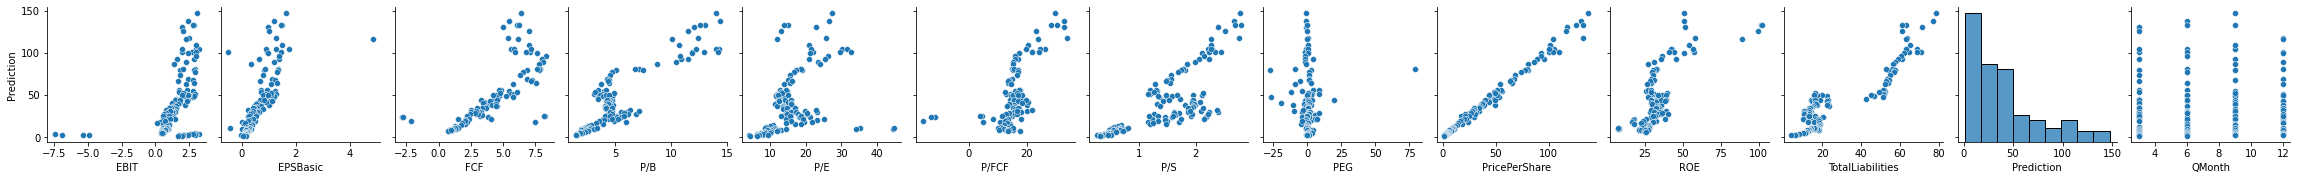

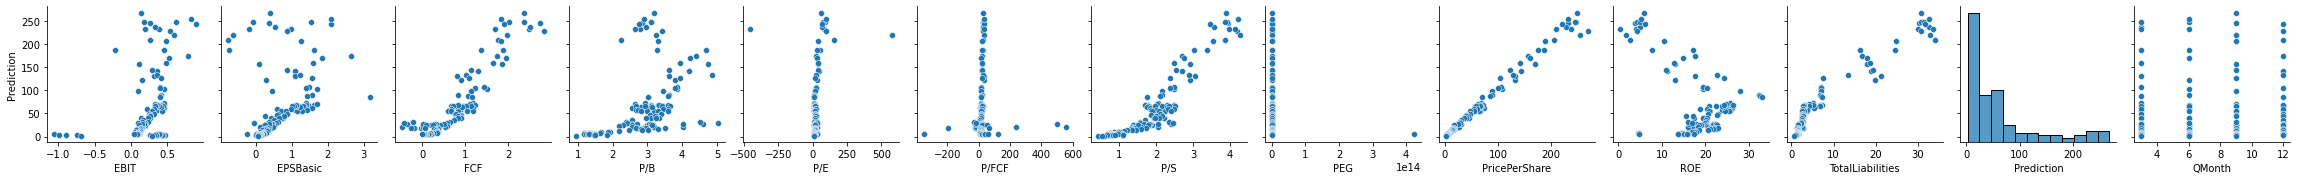

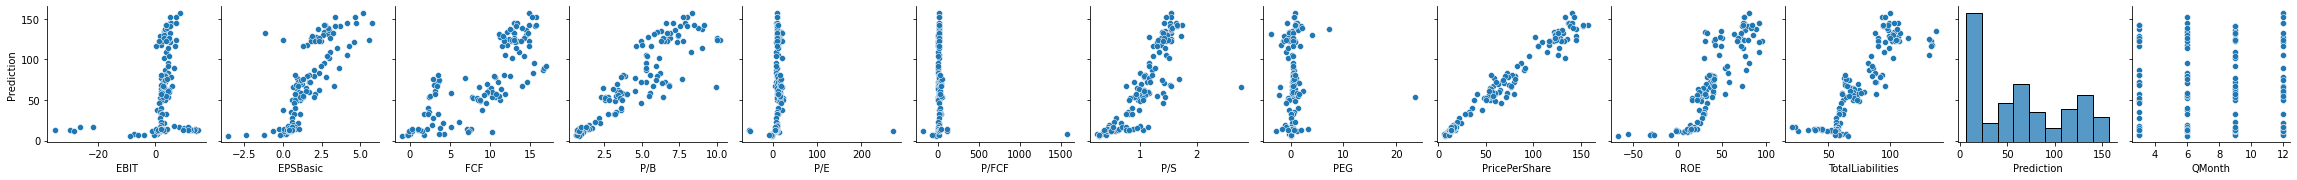

In [21]:
# Data visualization of features against dependent variable
for stock in stock_sel:
    sbn.pairplot(data.xs(stock, level=1, axis=1), y_vars=['Prediction'], kind="scatter")
    plt.show()

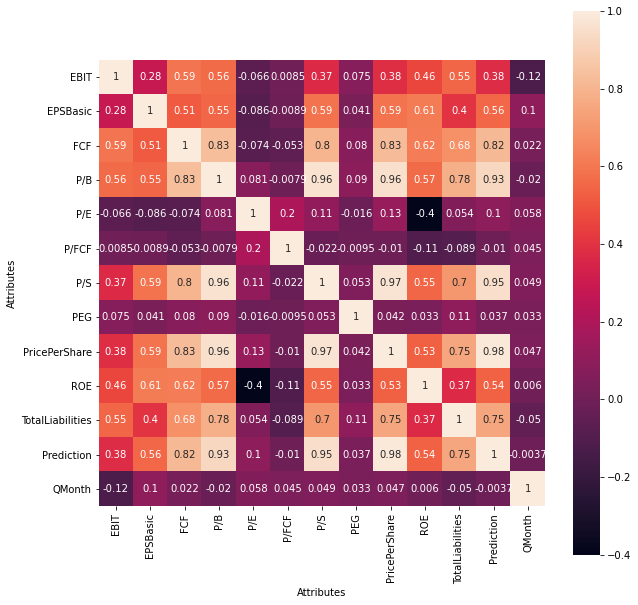

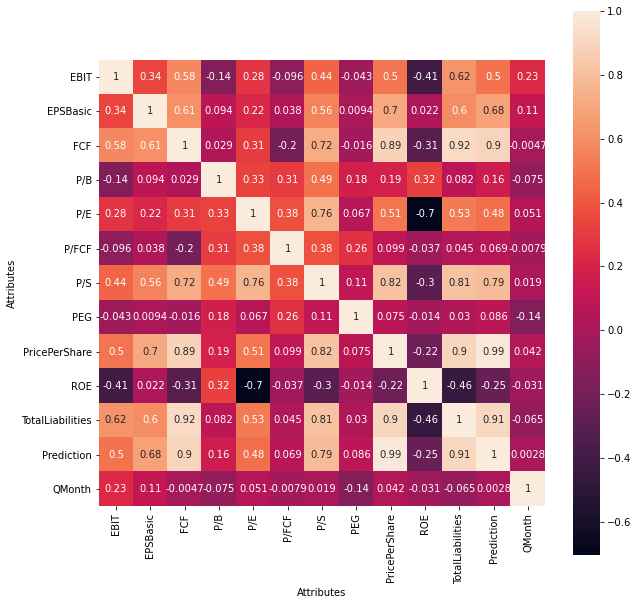

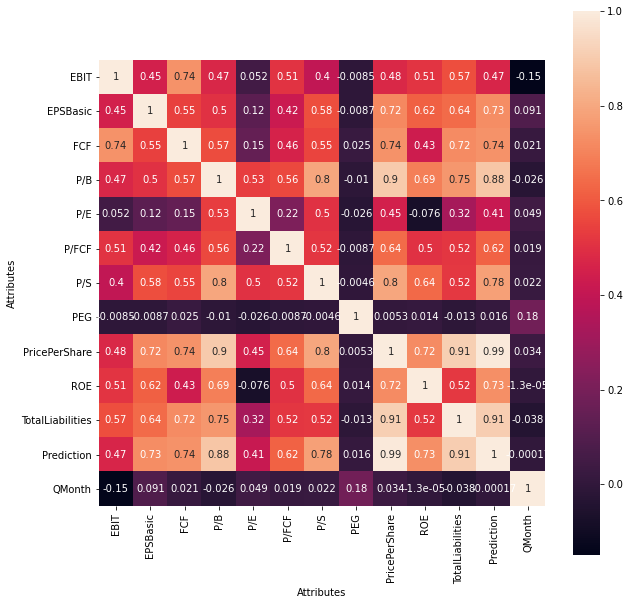

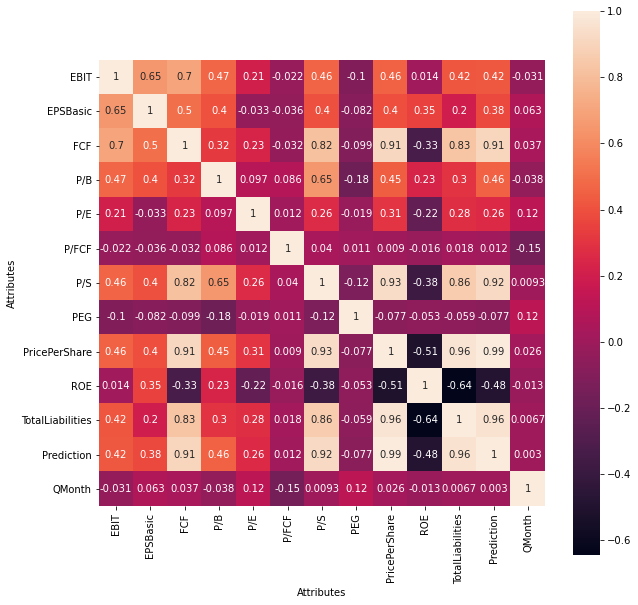

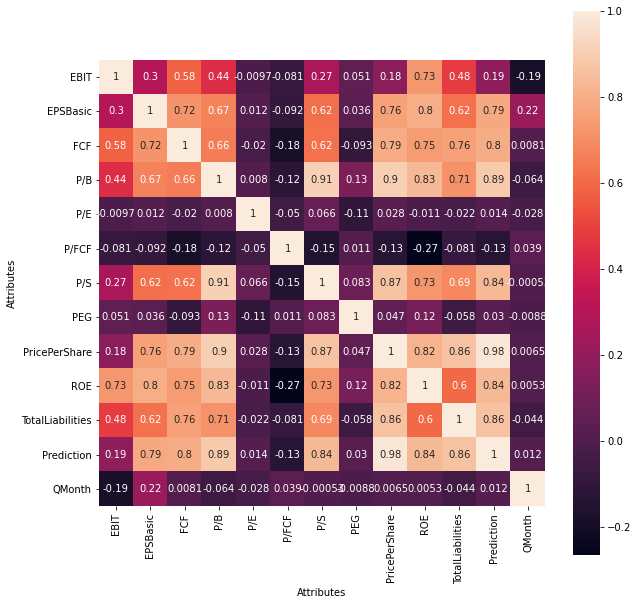

In [22]:
# Heat map of co-relation between numeric attributes
for stock in stock_sel:
    fig, ax = plt.subplots(figsize=(10,10))
    sbn.heatmap(data.xs(stock, level=1, axis=1).corr(), square=True, annot=True, ax=ax)

<AxesSubplot:>

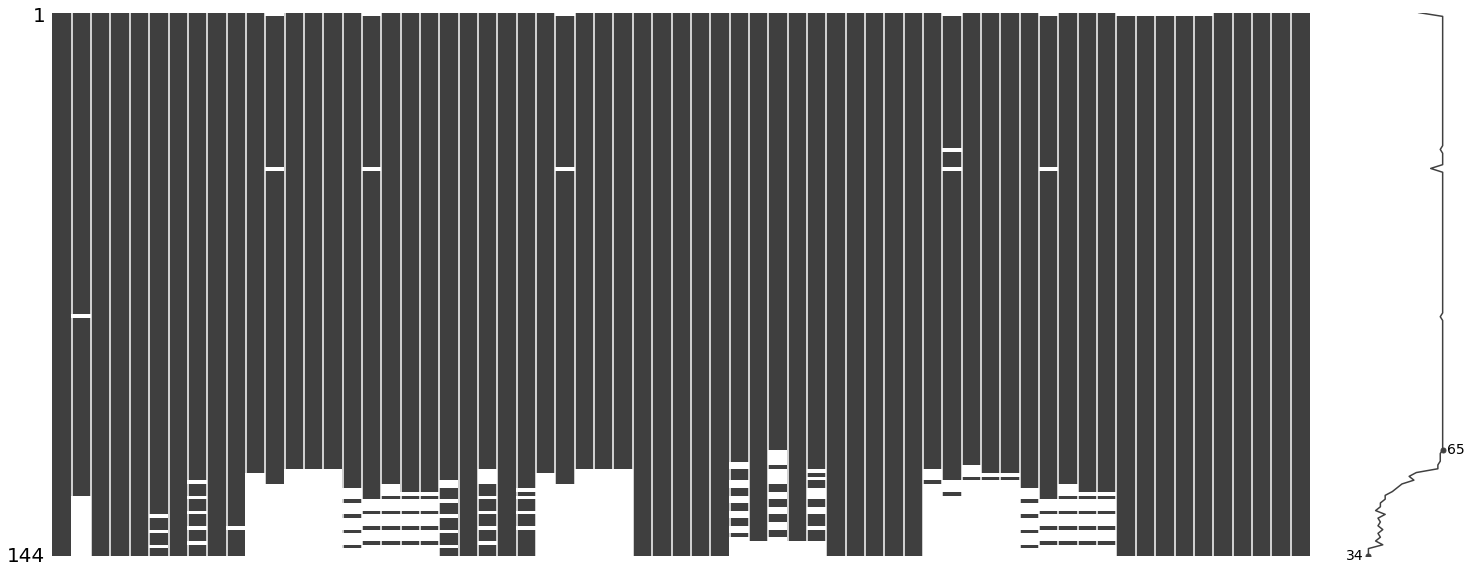

In [23]:
import missingno as msno
msno.matrix(data)

### 1.2.1 Observations
- Se pueden observar una acumlación de valores nulos en los primeros periodos
- Las correlaciones entre acciones son bastante variables (es posible que se deba a datos nulos)
- Se observan patrones en las gráficas, los cuales pueden indicar que existen patrones capaces de aprender por parte del modelo.

## 1.3 Data Cleansing

In [15]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
data = pd.read_csv(PATH+'manual_features_dataset.csv', header=[0,1], index_col=0, low_memory=False)
data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
include = ['P/E', 'PEG', 'FCF', 'P/FCF', 'P/S', 'P/B', 'ROE', 'EPSBasic', 'EBIT', 'TotalLiabilities', 'PricePerShare', 'Prediction', 'QMonth']
#include += ['EPSDiluted', 'EPSDiluted(TTM)', 'CashfromOperations', 'CashfromOperations(TTM)', 'NetChangeinCapitalExpenditures', 'NetChangeinCapitalExpenditures(TTM)', 'Revenue', 'Revenue(TTM)', 'NetIncome', 'NetIncome(TTM)', 'PricePerShare', 'TotalAssets', 'TotalLiabilities', 'AverageBasicSharesOutstanding', ]
data.drop(list(set(data.columns.get_level_values(0)) - set(include)), level=0, axis=1, inplace=True)
data

Attributes     EBIT                                  EPSBasic                 \
Symbol          BDX       GL     IBM     NSC     PEP      BDX      GL    IBM   
2020-12     1.27500  0.27139   1.606  1.0270  2.6960   3.3800  1.9600  1.520   
2020-09     0.26600  0.25321   2.150  0.8790  3.0970   0.3600  1.7800  1.900   
2020-06     0.38300  0.23505   1.894  0.6590  2.4030   0.9800  1.6300  1.530   
2020-03     0.33400  0.22373   0.277  0.5900  2.0010   0.5300  1.5400  1.320   
2019-12     0.53000  0.24759   4.347  0.9800  2.4920   0.8800  1.7300  4.140   
2019-09     0.13900  0.26842   1.954  1.0180  2.8930   0.4100  1.8500  1.890   
2019-06     0.61600  0.25019   3.116  1.0870  2.7900   1.5300  1.7000  2.820   
2019-03     0.17400  0.24938   2.093  1.0100  2.0720  -0.0700  1.6800  1.790   
2018-12     0.89700  0.22724   4.627  1.0780  2.2500   2.0900  1.4800  2.170   
2018-09     0.59500  0.24276   3.187  1.0500  2.9990  -0.6400  1.5900  2.950   
2018-06     0.82900  0.24928   2.949  1.0550  3.2080   2.0800  1.6300  2.630   
2018-03     0.19100  0.23446   1.301  0.8430  1.9510  -0.1900  1.5200  1.820   
2017-12     0.26300  0.23808   4.633  1.0270  2.6960  -0.7600  8.9300 -1.140   
2017-09     0.48300  0.24158   3.233  0.9340  3.0450   1.2700  1.3200  2.930   
2017-06    -0.22000  0.22308   2.590  0.9200  3.0390  -0.7500  1.2000  2.490   
2017-03     0.44800  0.21244   1.559  0.7970  1.9730   1.6100  1.1300  1.860   
2016-12     0.78700  0.19647   5.142  0.7830  2.4250   2.6400  1.1400  4.740   
2016-09     0.10400  0.22184   3.421  0.8490  2.8510   0.0900  1.2700  2.990   
2016-06     0.51900  0.22245   3.216  0.7740  2.9860   1.8300  1.1500  2.620   
2016-03     0.47500  0.21482   1.181  0.7390  1.6330   1.5900  1.0200  2.090   
2015-12     0.36300  0.19520   5.227  0.6700  2.2680   1.0800  1.0800  4.600   
2015-09     0.28900  0.21826   3.738  0.8610  1.4180   0.8600  1.1700  3.030   
2015-06     0.14400  0.21584   4.339  0.8330  2.9140   0.3000  1.0100  3.510   
2015-03     0.31600  0.21354   3.109  0.6270  1.8120   1.1000  0.9600  2.360   
2014-12     0.36100  0.21528   7.212  0.9310  2.0650   1.2200  1.1400  5.540   
2014-09     0.41300  0.21608   4.487  1.0300  2.8700   1.5600  1.0200  0.020   
2014-06     0.45600  0.21285   5.484  1.0370  2.9140   1.6900  1.0000  4.140   
2014-03     0.39600  0.21659   3.288  0.6930  1.8170   1.4800  1.0000  2.300   
2013-12     0.39300  0.21770   7.215  0.9320  2.4330   1.4000  1.0600  5.770   
2013-09     0.09400  0.21053   5.069  0.8790  2.7970   0.4600  0.9700  3.700   
2013-06     0.41400  0.21361   4.242  0.8650  2.8870   1.5500  0.9700  2.930   
2013-03     0.39500  0.19394   3.700  0.8260  1.6850   1.4200  0.8533  2.720   
2012-12     0.40100  0.24194   8.578  0.7590  2.2570   3.1800  1.0570  5.190   
2012-09     0.39712  0.20863   5.198  0.7640  2.8230   1.4500  0.9133  3.360   
2012-06     0.45339  0.20603   5.278  0.9650  2.3780   1.6200  0.8867  3.380   
2012-03     0.40466  0.18991   3.946  0.7740  1.7450   1.4100  0.7933  2.650   
2011-12     0.35182  0.19662   7.387  0.8420  2.2710   1.2300  0.8067  4.680   
2011-09     0.41630  0.20963   5.134  0.9980  2.9060   1.3900  0.8333  3.230   
2011-06     0.45738  0.22846   4.982  0.9090  2.7740   1.5700  0.8600  3.040   
2011-03     0.45238  0.16698   3.910  0.6270  1.7430   1.4100  0.5733  2.340   
2010-12     0.42370  0.20647   7.057  0.6930  2.2800   1.3900  0.7600  4.240   
2010-09     0.33198  0.22710   4.772  0.8270  2.8280   1.7100  0.6333  2.860   
2010-06     0.42646  0.19953   4.665  0.7500  2.4720   1.3200  0.4533  2.650   
2010-03     0.42346  0.19299   3.616  0.5750  1.5550   1.2600  0.6533  2.000   
2009-12     0.43610  0.18066   6.462  0.5860  2.1320   1.3300  0.6067  3.650   
2009-09     0.39004  0.16410   4.457  0.5990  2.3940   1.3200  0.5422  2.440   
2009-06     0.44028  0.17532   4.363  0.5040  2.3370   1.4200  0.6133  2.340   
2009-03     0.35928  0.14196   3.258  0.4000  1.6130   1.0900  0.4044  1.710   


In [16]:
# Replace inf values by nan
data.replace(np.inf, np.nan, inplace=True)
# Fill None values with the previous valid value
data.fillna(method='ffill', axis=0, inplace=True)
data.fillna(method='bfill', axis=0, inplace=True)
data.drop(['2020-12'], axis=0, inplace=True)
data

Attributes     EBIT                                  EPSBasic                 \
Symbol          BDX       GL     IBM     NSC     PEP      BDX      GL    IBM   
2020-09     0.26600  0.25321   2.150  0.8790  3.0970   0.3600  1.7800  1.900   
2020-06     0.38300  0.23505   1.894  0.6590  2.4030   0.9800  1.6300  1.530   
2020-03     0.33400  0.22373   0.277  0.5900  2.0010   0.5300  1.5400  1.320   
2019-12     0.53000  0.24759   4.347  0.9800  2.4920   0.8800  1.7300  4.140   
2019-09     0.13900  0.26842   1.954  1.0180  2.8930   0.4100  1.8500  1.890   
2019-06     0.61600  0.25019   3.116  1.0870  2.7900   1.5300  1.7000  2.820   
2019-03     0.17400  0.24938   2.093  1.0100  2.0720  -0.0700  1.6800  1.790   
2018-12     0.89700  0.22724   4.627  1.0780  2.2500   2.0900  1.4800  2.170   
2018-09     0.59500  0.24276   3.187  1.0500  2.9990  -0.6400  1.5900  2.950   
2018-06     0.82900  0.24928   2.949  1.0550  3.2080   2.0800  1.6300  2.630   
2018-03     0.19100  0.23446   1.301  0.8430  1.9510  -0.1900  1.5200  1.820   
2017-12     0.26300  0.23808   4.633  1.0270  2.6960  -0.7600  8.9300 -1.140   
2017-09     0.48300  0.24158   3.233  0.9340  3.0450   1.2700  1.3200  2.930   
2017-06    -0.22000  0.22308   2.590  0.9200  3.0390  -0.7500  1.2000  2.490   
2017-03     0.44800  0.21244   1.559  0.7970  1.9730   1.6100  1.1300  1.860   
2016-12     0.78700  0.19647   5.142  0.7830  2.4250   2.6400  1.1400  4.740   
2016-09     0.10400  0.22184   3.421  0.8490  2.8510   0.0900  1.2700  2.990   
2016-06     0.51900  0.22245   3.216  0.7740  2.9860   1.8300  1.1500  2.620   
2016-03     0.47500  0.21482   1.181  0.7390  1.6330   1.5900  1.0200  2.090   
2015-12     0.36300  0.19520   5.227  0.6700  2.2680   1.0800  1.0800  4.600   
2015-09     0.28900  0.21826   3.738  0.8610  1.4180   0.8600  1.1700  3.030   
2015-06     0.14400  0.21584   4.339  0.8330  2.9140   0.3000  1.0100  3.510   
2015-03     0.31600  0.21354   3.109  0.6270  1.8120   1.1000  0.9600  2.360   
2014-12     0.36100  0.21528   7.212  0.9310  2.0650   1.2200  1.1400  5.540   
2014-09     0.41300  0.21608   4.487  1.0300  2.8700   1.5600  1.0200  0.020   
2014-06     0.45600  0.21285   5.484  1.0370  2.9140   1.6900  1.0000  4.140   
2014-03     0.39600  0.21659   3.288  0.6930  1.8170   1.4800  1.0000  2.300   
2013-12     0.39300  0.21770   7.215  0.9320  2.4330   1.4000  1.0600  5.770   
2013-09     0.09400  0.21053   5.069  0.8790  2.7970   0.4600  0.9700  3.700   
2013-06     0.41400  0.21361   4.242  0.8650  2.8870   1.5500  0.9700  2.930   
2013-03     0.39500  0.19394   3.700  0.8260  1.6850   1.4200  0.8533  2.720   
2012-12     0.40100  0.24194   8.578  0.7590  2.2570   3.1800  1.0570  5.190   
2012-09     0.39712  0.20863   5.198  0.7640  2.8230   1.4500  0.9133  3.360   
2012-06     0.45339  0.20603   5.278  0.9650  2.3780   1.6200  0.8867  3.380   
2012-03     0.40466  0.18991   3.946  0.7740  1.7450   1.4100  0.7933  2.650   
2011-12     0.35182  0.19662   7.387  0.8420  2.2710   1.2300  0.8067  4.680   
2011-09     0.41630  0.20963   5.134  0.9980  2.9060   1.3900  0.8333  3.230   
2011-06     0.45738  0.22846   4.982  0.9090  2.7740   1.5700  0.8600  3.040   
2011-03     0.45238  0.16698   3.910  0.6270  1.7430   1.4100  0.5733  2.340   
2010-12     0.42370  0.20647   7.057  0.6930  2.2800   1.3900  0.7600  4.240   
2010-09     0.33198  0.22710   4.772  0.8270  2.8280   1.7100  0.6333  2.860   
2010-06     0.42646  0.19953   4.665  0.7500  2.4720   1.3200  0.4533  2.650   
2010-03     0.42346  0.19299   3.616  0.5750  1.5550   1.2600  0.6533  2.000   
2009-12     0.43610  0.18066   6.462  0.5860  2.1320   1.3300  0.6067  3.650   
2009-09     0.39004  0.16410   4.457  0.5990  2.3940   1.3200  0.5422  2.440   
2009-06     0.44028  0.17532   4.363  0.5040  2.3370   1.4200  0.6133  2.340   
2009-03     0.35928  0.14196   3.258  0.4000  1.6130   1.0900  0.4044  1.710   
2008-12     0.42937  0.17646   5.999  0.8310  1.1430   1.2900  0.7111  3.270   


## 1.4 Data Transformation

In [17]:
data.drop(['EBIT', 'EPSBasic', 'TotalLiabilities'], level=0, axis=1, inplace=True)
data.drop(['P/FCF', 'P/E', 'PEG', 'P/B', 'P/S'], level=0, axis=1, inplace=True)
#data.drop(['P/FCF', 'P/E', 'PEG', 'PricePerShare'], level=0, axis=1, inplace=True)

In [18]:
X = data.drop(['Prediction'], level=0, axis=1)
y = data['Prediction']
display(X.shape, y.shape)

(143, 20)

(143, 5)

In [19]:
def dfM(stockName, X):
    scaler = StandardScaler()
    Xsc = scaler.fit_transform(X.xs(stockName, level=1, axis=1))
    df = pd.DataFrame(data = Xsc, columns = X.xs(stockName, level=1, axis=1).columns, index=X.xs(stockName, level=1, axis=1).index)
    df['Prediction'] = y[stockName].values
    return df

In [20]:
stock_sel = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
dfsM = {}
for stock in stock_sel:
    dfsM[stock] = dfM(stock, X)
dfsM

{'NSC': Attributes       FCF  PricePerShare       ROE    QMonth  Prediction
 2020-09     2.707551       3.660791 -0.027280  0.457899  235.031281
 2020-06     2.404470       2.829898  0.072763 -0.439081  212.222305
 2020-03     2.639781       2.190186  0.426447 -1.336060  173.271912
 2019-12     2.310346       3.179928  0.708235  1.354878  143.283661
 2019-09     2.022324       2.859300  0.640902  0.457899  189.680557
 2019-06     2.093859       3.246309  0.693752 -0.439081  174.650208
 2019-03     2.090094       2.973078  0.684980 -1.336060  192.792343
 2018-12     2.125861       2.190016  0.910595  1.354878  179.983856
 2018-09     2.432707       2.805206  4.714914  0.457899  143.275711
 2018-06     2.223751       2.188000  4.269857 -0.439081  172.114410
 2018-03     1.711713       1.868605  4.083428 -1.336060  143.181198
 2017-12     1.664651       2.038377  3.965021  1.354878  128.208679
 2017-09     1.210971       1.772325  0.226521  0.457899  136.167236
 2017-06     1.306978      

## 1.5 Data Visualization

In [21]:
dfsM['IBM']

Attributes       FCF  PricePerShare       ROE    QMonth  Prediction
2020-09     0.916929       1.150365  0.187576  0.457899  122.700371
2020-06     0.820565       1.099578  0.250438 -0.439081  118.349457
2020-03     0.703972       0.869220  0.471414 -1.336060  115.955757
2019-12     0.772199       1.305924  0.383409  1.354878  105.098518
2019-09     0.857529       1.498546  0.241106  0.457899  125.681244
2019-06     0.932745       1.319116  0.464222 -0.439081  134.759933
2019-03     0.749763       1.349112  0.528202 -1.336060  126.303001
2018-12     0.665537       0.797188  0.433829  1.354878  127.716805
2018-09     0.933664       1.473727 -0.179586  0.457899  101.703552
2018-06     0.807140       1.229987 -0.135862 -0.439081  133.590149
2018-03     1.069383       1.453363 -0.136861 -1.336060  122.102196
2017-12     0.972283       1.425745 -0.068471  1.354878  132.630325
2017-09     0.644940       1.248198  0.979759  0.457899  131.328659
2017-06     0.757855       1.376621  1.136847 -0.439081  122.960541
2017-03     0.720523       1.708043  1.226632 -1.336060  129.013351
2016-12     0.969157       1.541477  1.362827  1.354878  144.633926
2016-09     1.261192       1.391674  1.423693  0.457899  136.783325
2016-06     1.255123       1.246655  1.710225 -0.439081  129.722809
2016-03     1.329603       1.216120  2.067224 -1.336060  122.887802
2015-12     1.000420       0.957140  1.945897  1.354878  121.448616
2015-09     1.102118       1.058240  1.955174  0.457899  109.242401
2015-06     1.025615       1.331061  1.334657 -0.439081  114.007423
2015-03     0.973939       1.275368  1.134573 -1.336060  126.866035
2014-12     0.923366       1.256027  1.381231  1.354878  124.241081
2014-09     0.987363       1.714316  1.509890  0.457899  123.329521
2014-06     0.967134       1.558393  1.934168 -0.439081  144.929581
2014-03     0.896700       1.721129  1.847567 -1.336060  137.580627
2013-12     1.044740       1.625986  1.340186  1.354878  145.250687
2013-09     1.014213       1.572181  1.533943  0.457899  140.766388
2013-06     1.155265       1.651043  1.629093 -0.439081  138.230453
2013-03     1.320592       1.985052  1.687349 -1.336060  141.947418
2012-12     1.325006       1.631299  1.559534  1.354878  157.689911
2012-09     1.457966       1.865534  1.290282  0.457899  141.016815
2012-06     1.482425       1.668006  1.381254 -0.439081  152.056793
2012-03     1.482609       1.856921  1.310841 -1.336060  142.746872
2011-12     1.382015       1.463946  1.359504  1.354878  151.650833
2011-09     1.307903       1.314787  1.265049  0.457899  133.129135
2011-06     1.200137       1.252612  1.129189 -0.439081  126.098991
2011-03     1.148461       1.112375  1.078467 -1.336060  123.168564
2010-12     1.311397       0.856249  1.246531  1.354878  116.558899
2010-09     1.212274       0.656650  1.414403  0.457899  104.487190
2010-06     1.445093       0.487180  1.562576 -0.439081   95.079712
2010-03     1.643890       0.548775  1.441510 -1.336060   87.092262
2009-12     1.660993       0.579551  0.634759  1.354878   89.995323
2009-09     1.711014       0.404289  0.715488  0.457899   91.445862
2009-06     1.414565       0.172994  0.766317 -0.439081   83.185410
2009-03     1.268364       0.055005  0.806435 -1.336060   72.284058
2008-12     1.151403      -0.137647  1.284024  1.354878   66.722969
2008-09     0.772567       0.329553  0.640148  0.457899   57.642910
2008-06     0.878310       0.345595  0.195534 -0.439081   79.662956
2008-03     0.740936       0.290048  0.106943 -1.336060   80.419060
2007-12     0.536990       0.183216 -0.060032  1.354878   77.801025
2007-09     0.602826       0.315805  0.069663  0.457899   72.765831
2007-06     0.521910       0.131922  0.168876 -0.439081   79.014992
2007-03     0.356767      -0.029113 -0.115206 -1.336060   70.348244
2006-12     0.402558       0.007589 -0.090956  1.354878   62.758339
2006-09     0.459935      -0.210359 -0.226097  0.457899   64.488174
2006-06     0.552437      -0.286520 -0.288634 -0.439081 

'NSC'

'GL'

'PEP'

'BDX'

'IBM'

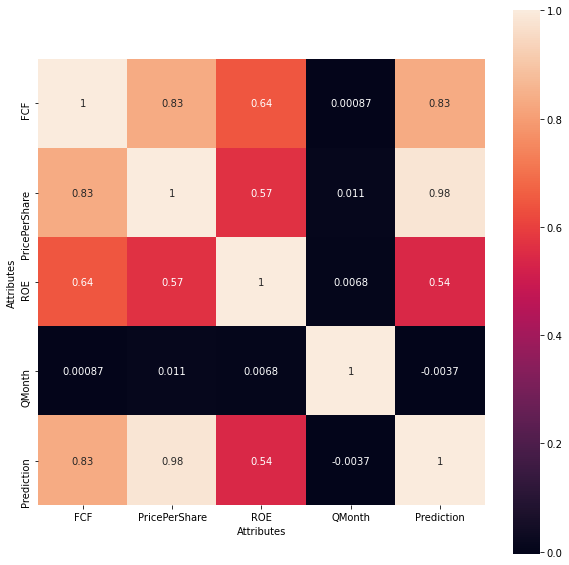

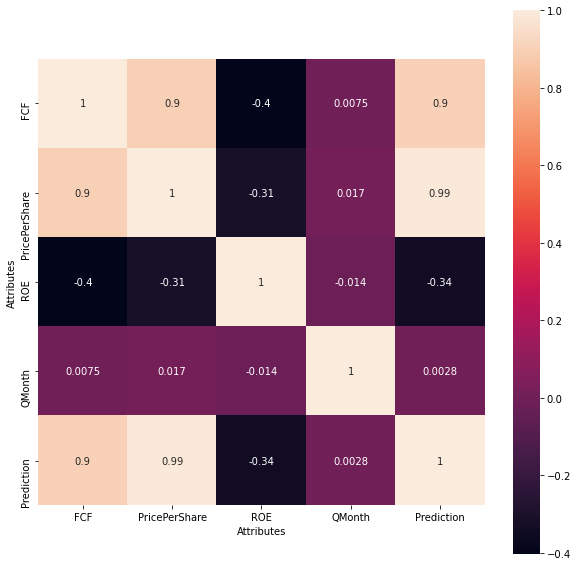

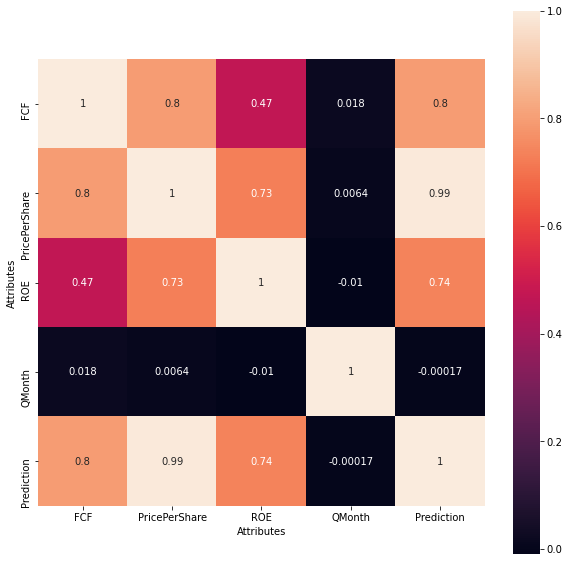

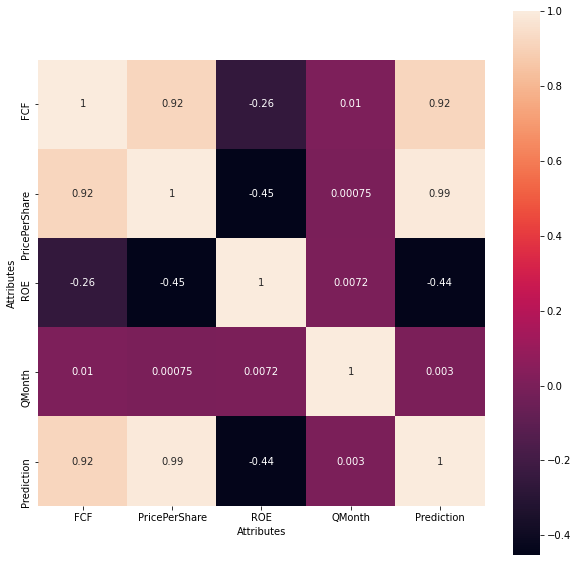

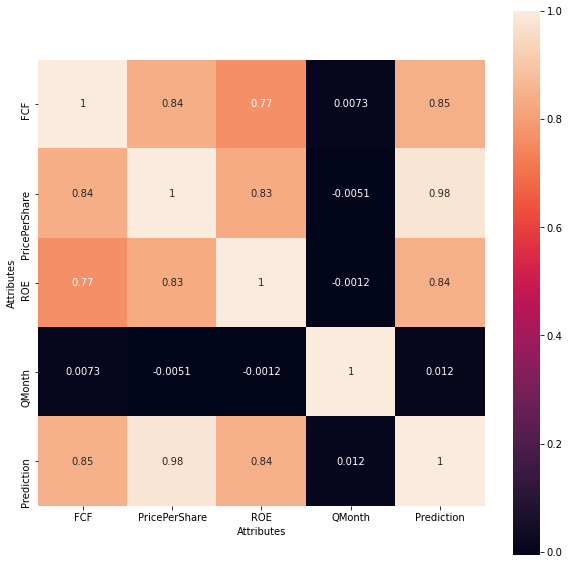

In [22]:
# Heat map of co-relation between numeric attributes
for stock in stock_sel:
    fig, ax = plt.subplots(figsize=(10,10))
    display(stock)
    sbn.heatmap(dfsM[stock].corr(), square=True, annot=True, ax=ax)

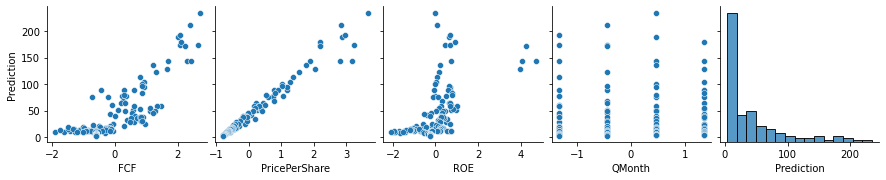

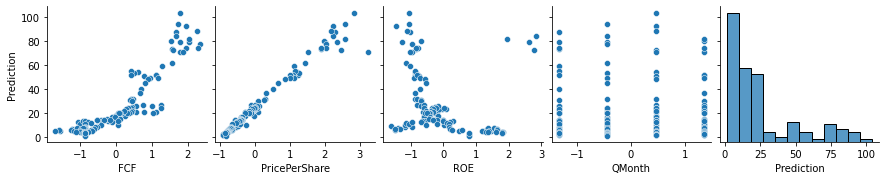

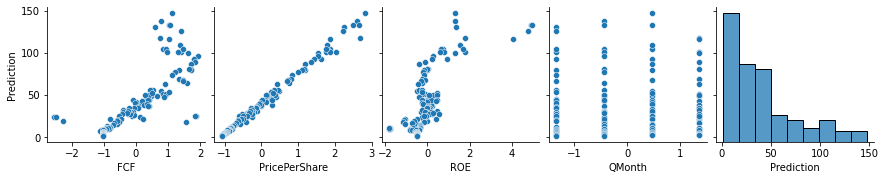

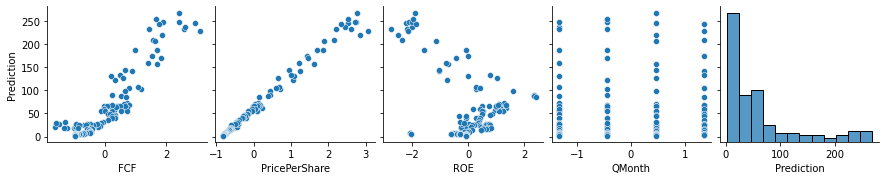

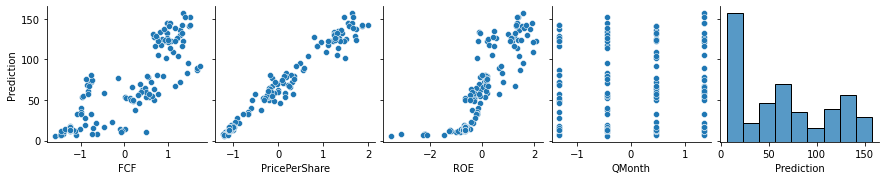

In [23]:
for stock in stock_sel:
    sbn.pairplot(dfsM[stock], y_vars=['Prediction'], kind="scatter")
    plt.show()

In [24]:
for stock in stock_sel:
    dfsM[stock].to_csv(PATH+'{}_Manual_dataset.csv'.format(stock))